1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Ans:
Matrix Multiplication of two matrices involves multiplying elements from rows of first matrix with corresponding elements from columns of second matrix and then summing up those products.
Here we have two matrices A of size (n,k) and B of size (k,m). If we multiply these two matrices, then the resulting matrix C(i.e. AB) will be of size (n,m). Total no. of elements in matrix C will be equal to nm.

Let element in C is represented by $$c_{ij}$$
Then 
$$c_{ij} = \sum_{p=1}^{k} A_{ip} \cdot B_{pj}
$$

a) Here, while computing each element in matrix C ,we are multiplying elements from ith row of matrix A with elements from the jth column of matrix B. Since both matrices have size K in the common dimension, we need to perform k multiplications.

b) After k multiplications, we will sum these products to get final value of$$c_{ij}$$. So,we need to perform (k-1) additions.

No. of multiplications for calculating each element in C = k

No. of multiplications for calculating all elements in C =$$ nmk $$

No. of additions for calculating each element in C = k-1

No. of additions for calculating all elements in C =$$ nm(k-1) $$

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [3]:
import timeit
import numpy as np

def matrixmul(A,B):
    C=[[0]*len(B[0]) for i in range(len(A))]
    for i in range(len(C)):
        for j in range(len(C[0])):
            for p in range(len(B)):
                C[i][j]+=A[i][p]*B[p][j]
    return C

A=np.random.rand(120, 90)
B= np.random.rand(90, 150)

start1=timeit.default_timer()
result1=matrixmul(A,B)
end1=timeit.default_timer()
print(f"Time using list of lists :",end1-start1)

start2=timeit.default_timer()
result2=np.dot(A,B)
end2=timeit.default_timer()
print(f"Time using numpy :",end2-start2)

Time using list of lists : 1.0399999999999636
Time using numpy : 0.006900001000303746


Numpy is faster because numpy array consists of homogeneous data-types that are stored consecutively in memory which allows for more efficient access patterns.This contributes to faster matrix multiplication as compared to scattered memory layout of nested python lists.

3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Ans: This method is like Bubble Sort.After sorting,we can find the median. So, the time complexity is O(n^2).
I'll suggest quicksort for sorting whose time complexity is O(nlogn).

In [4]:
import numpy as np
import timeit

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i = i + 1
            (arr[i], arr[j]) = (arr[j], arr[i])

    (arr[i + 1], arr[high]) = (arr[high], arr[i + 1])
    return i + 1
 
def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

def median(sorted_array):
    n = len(sorted_array)
    if n % 2 == 1:
        return sorted_array[n // 2]
    else:
        mid1 = sorted_array[(n // 2) - 1]
        mid2 = sorted_array[n // 2]
        return (mid1 + mid2) / 2
    
np.random.seed(0)
random_array = np.random.randint(1, 1000, size=1000)
arr1= random_array.copy()
arr2 = random_array.copy()

# Time for bubble sort
start_time1 = timeit.default_timer()
bubble_sort(arr1)
bubble_median=median(arr1)
end_time1 = timeit.default_timer()
bubble_sort_time=end_time1-start_time1
print("Median calulated by using Bubblesort:",bubble_median)
print(f"Bubble Sort Time: {bubble_sort_time} seconds")

## Time for bubble sort
start_time2 = timeit.default_timer()
quick_sort(arr2,0,len(arr2)-1)
quick_median=median(arr2)
end_time2 = timeit.default_timer()
quick_sort_time=end_time2-start_time2
print("Median calulated by using Quicksort:",quick_median)
print(f"Quick Sort Time: {quick_sort_time} seconds")

# Time for NumPy's median
start_time = timeit.default_timer()
numpy_median = np.median(random_array)
end_time=timeit.default_timer()
numpy_median_time = end_time - start_time
print("Median calulated by using Numpymedian:",numpy_median)
print(f"NumPy Median Time: {numpy_median_time} seconds")

Median calulated by using Bubblesort: 516.0
Bubble Sort Time: 0.18879999999990105 seconds
Median calulated by using Quicksort: 516.0
Quick Sort Time: 0.053200000999822805 seconds
Median calulated by using Numpymedian: 516.0
NumPy Median Time: 0.0005000000001018634 seconds


4. What is the gradient of the following function with respect to x and y?
$$
x^2y + y^3\sin (x)$$


Ans: Let 
$$
f = x^2y + y^3\sin (x)
$$

then gradient wrt x is given by
$$
\frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$

and gradient wrt y is given by
$$
\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$



5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [ ]:
pip install jax jaxlib

In [ ]:
import jax
import jax.numpy as np

def f(x, y):
    return ((x*2) * y) + ((y*3) * np.sin(x))

def grad_analytical(x, y):
    df_dx = (2 * x * y) + (y**3) * np.cos(x)
    df_dy = (x*2) + (3 * (y**2) * np.sin(x))
    return df_dx, df_dy

grad_jax = jax.grad(f, argnums=(0, 1))

rng = jax.random.PRNGKey(0)
x_values = jax.random.uniform(rng, shape=(3,))
y_values = jax.random.uniform(rng, shape=(3,))

for x, y in zip(x_values, y_values):
    analytical_grad = grad_analytical(x, y)
    jax_grad = grad_jax(x, y)
    print(f"Input values: x={x:.4f}, y={y:.4f}")
    print(f"Analytical Gradient: {analytical_grad}")
    print(f"JAX Gradient: {jax_grad}")
    print("\n")

6. Use sympy to confirm that you obtain the same gradient analytically.

In [15]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

# Find the partial derivatives
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Display the results
df_dx, df_dy

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [8]:
students_marks = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Bindusri', 'Marks': {'Maths': 100, 'English': 70,'Physics': 80,'Chemistry': 90,'Biology': 89}},
            2: {'Name': 'Ushasree', 'Marks': {'Maths': 100, 'English': 80,'Physics': 85,'Chemistry': 99,'Biology':95 }},
            3: {'Name': 'Sreeja', 'Marks': {'Maths': 90, 'English': 75,'Physics': 80,'Chemistry': 90,'Biology':100 }}
        },
        'Branch 2': {
            1: {'Name': 'Nayana', 'Marks': {'Maths': 100, 'English': 100,'Physics': 100,'Chemistry': 100,'Biology':100 }},
            2: {'Name': 'Aadya', 'Marks': {'Maths': 25, 'English': 15,'Physics':70,'Chemistry': 9,'Biology':50 }}
        },
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Rishi', 'Marks': {'Maths': 95, 'English': 80,'Physics': 75,'Chemistry': 98,'Biology':92 }}
        },
        'Branch 2': {
            1: {'Name': 'Sahil', 'Marks': {'Maths': 90, 'English': 20,'Physics': 55,'Chemistry': 85,'Biology':75 }}
        },
    },
    2024: {
        'Branch 1': {1: {'Name': 'Sridhar', 'Marks': {'Maths': 15, 'English': 20,'Physics': 5,'Chemistry': 9,'Biology':10 }}},
        'Branch 2': {1: {'Name': 'Ramesh', 'Marks': {'Maths': 75, 'English': 90,'Physics': 65,'Chemistry': 60,'Biology':20 }}}
    },
    2025: {
        'Branch 1': {1: {'Name': 'Ravali', 'Marks': {'Maths': 100, 'English': 70,'Physics': 80,'Chemistry': 79,'Biology':89 }}},
        'Branch 2': {1: {'Name': 'Sruthi', 'Marks': {'Maths': 99, 'English': 90,'Physics': 85,'Chemistry': 20,'Biology':55 }},
                     2: {'Name': 'Meghana', 'Marks': {'Maths': 70, 'English':75,'Physics': 45,'Chemistry': 59,'Biology':70 }},
    3: {'Name': 'Harika', 'Marks': {'Maths': 90, 'English': 85,'Physics': 75,'Chemistry': 69,'Biology':100 }}}
    }
}

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [9]:
class Year:
    def __init__(self,year):
        self.year=year
        self.branches=[]
    def add_branch(self,branch):
        self.branches.append(branch)
class Branch:
    def __init__(self,branch):
        self.branch=branch
        self.students=[]
    def add_student(self,student):
        self.students.append(student)
class Student:
    def __init__(self,rollnumber,name,marks):
        self.rollnumber=rollnumber
        self.name=name
        self.marks=marks

s1=Student('Bindusri',1,{'Maths': 100, 'English': 70,'Physics': 80,'Chemistry': 90,'Biology': 89})
s2=Student('Ushasree',2, {'Maths': 100, 'English': 80,'Physics': 85,'Chemistry': 99,'Biology':95 })
s3=Student('Sreeja',3,{'Maths': 90, 'English': 75,'Physics': 80,'Chemistry': 90,'Biology':100 })
s4=Student('Nayana',1,{'Maths': 100, 'English': 100,'Physics': 100,'Chemistry': 100,'Biology':100 })
s5=Student('Aadya',2,{'Maths': 25, 'English': 15,'Physics':70,'Chemistry': 9,'Biology':50 })
s6=Student('Rishi',1,{'Maths': 95, 'English': 80,'Physics': 75,'Chemistry': 98,'Biology':92 })
s7=Student('Sahil',1,{'Maths': 90, 'English': 20,'Physics': 55,'Chemistry': 85,'Biology':75 })
s8=Student('Sridhar',1, {'Maths': 15, 'English': 20,'Physics': 5,'Chemistry': 9,'Biology':10 })
s9=Student('Ramesh', 1,{'Maths': 75, 'English': 90,'Physics': 65,'Chemistry': 60,'Biology':20 })
s10=Student('Ravali',1,{'Maths': 100, 'English': 70,'Physics': 80,'Chemistry': 79,'Biology':89 })
s11=Student('Sruthi',1,{'Maths': 99, 'English': 90,'Physics': 85,'Chemistry': 20,'Biology':55 })
s12=Student('Meghana',2,{'Maths': 70, 'English':75,'Physics': 45,'Chemistry': 59,'Biology':70 })
s13=Student('Harika',3,{'Maths': 90, 'English': 85,'Physics': 75,'Chemistry': 69,'Biology':100 })

b1=Branch('Branch1')
b2=Branch('Branch2')
b1.add_student(s1)
b1.add_student(s2)
b1.add_student(s3)
b2.add_student(s4)
b2.add_student(s5)
Y2022=Year(2022)
Y2022.add_branch(b1)
Y2022.add_branch(b2)

b1=Branch('Branch1')
b2=Branch('Branch2')
b1.add_student(s6)
b2.add_student(s7)
Y2023=Year(2023)
Y2023.add_branch(b1)
Y2023.add_branch(b2)

b1=Branch('Branch1')
b2=Branch('Branch2')
b1.add_student(s8)
b2.add_student(s9)
Y2024=Year(2024)
Y2024.add_branch(b1)
Y2024.add_branch(b2)

b1=Branch('Branch1')
b2=Branch('Branch2')
b1.add_student(s10)
b2.add_student(s11)
b2.add_student(s12)
b2.add_student(s13)
Y2025=Year(2025)
Y2025.add_branch(b1)
Y2025.add_branch(b2)

overall_database=[Y2022,Y2023,Y2024,Y2025]

9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

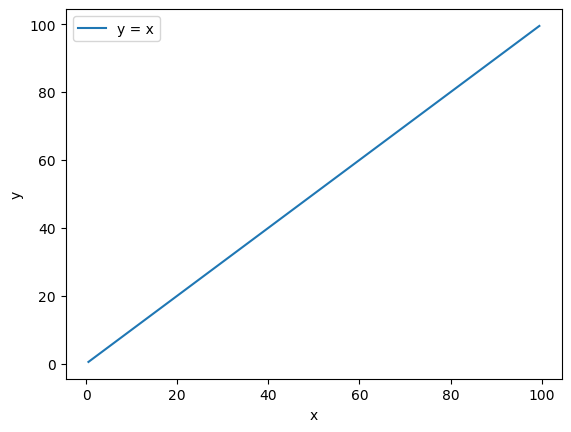

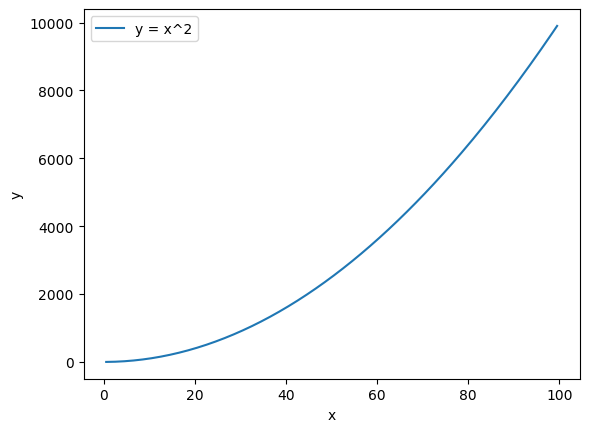

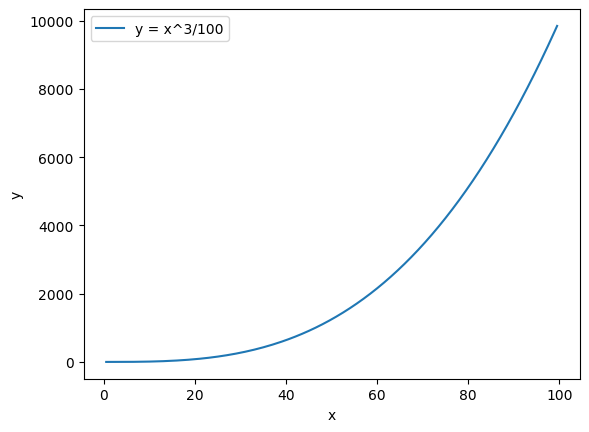

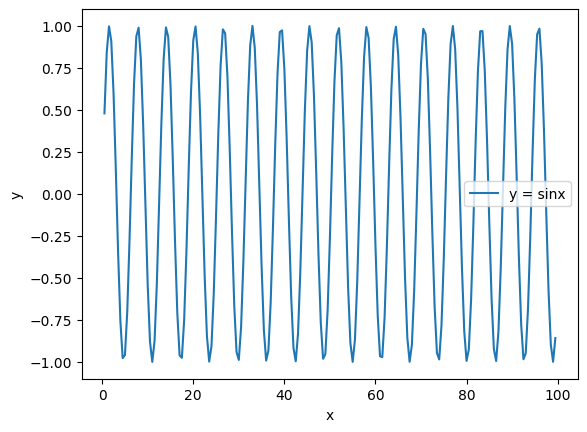

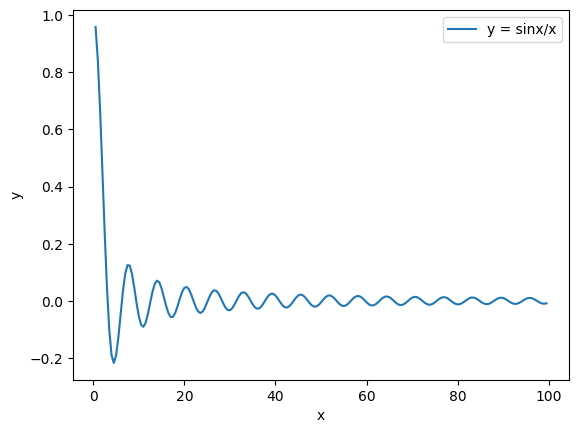

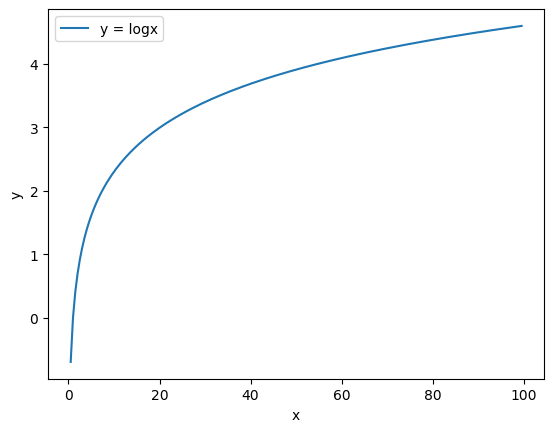

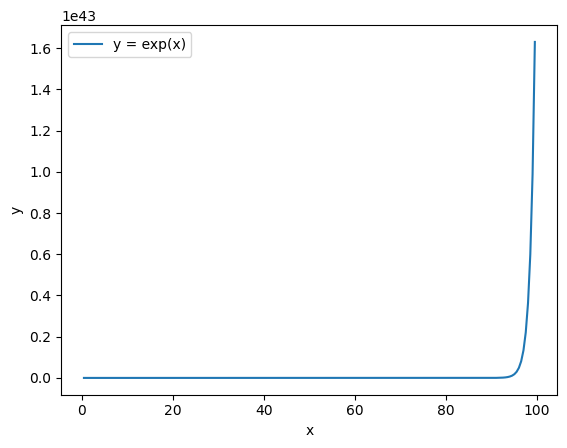

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def function1(x):
    return x

def function2(x):
    return x ** 2

def function3(x):
    return (x**3)/100

def function4(x):
    return np.sin(x)

def function5(x):
    return np.sin(x)/x

def function6(x):
    return np.log(x)

def function7(x):
    return np.exp(x)

x_values = np.arange(0.5, 100, 0.5)

y_values1 = function1(x_values)
y_values2 = function2(x_values)
y_values3 = function3(x_values)
y_values4 = function4(x_values)
y_values5 = function5(x_values)
y_values6 = function6(x_values)
y_values7 = function7(x_values)

plt.plot(x_values, y_values1, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(x_values, y_values2, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(x_values, y_values3, label='y = x^3/100')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(x_values, y_values4, label='y = sinx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(x_values, y_values5, label='y = sinx/x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(x_values, y_values6, label='y = logx')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

plt.plot(x_values, y_values7, label='y = exp(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [24]:
import numpy as np
import pandas as pd
np.random.seed(0)
matrix = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
max_std_column = df.std().idxmax()
min_mean_row = df.mean(axis=1).idxmin()

print("DataFrame:")
print(df)
print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)

DataFrame:
           a         b         c         d         e
0   1.548814  1.715189  1.602763  1.544883  1.423655
1   1.645894  1.437587  1.891773  1.963663  1.383442
2   1.791725  1.528895  1.568045  1.925597  1.071036
3   1.087129  1.020218  1.832620  1.778157  1.870012
4   1.978618  1.799159  1.461479  1.780529  1.118274
5   1.639921  1.143353  1.944669  1.521848  1.414662
6   1.264556  1.774234  1.456150  1.568434  1.018790
7   1.617635  1.612096  1.616934  1.943748  1.681820
8   1.359508  1.437032  1.697631  1.060225  1.666767
9   1.670638  1.210383  1.128926  1.315428  1.363711
10  1.570197  1.438602  1.988374  1.102045  1.208877
11  1.161310  1.653108  1.253292  1.466311  1.244426
12  1.158970  1.110375  1.656330  1.138183  1.196582
13  1.368725  1.820993  1.097101  1.837945  1.096098
14  1.976459  1.468651  1.976761  1.604846  1.739264
15  1.039188  1.282807  1.120197  1.296140  1.118728
16  1.317983  1.414263  1.064147  1.692472  1.566601
17  1.265389  1.523248  1.093941  1

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [25]:
df['f']=df.sum(axis=1)
df['g']=np.where(df['f']<8,'LT8','GT8')
print("DataFrame:")
print(df)
LT8_rows= df[df['g']=='LT8']              
std_LT8_rows=df[df['g']=='LT8']['f'].std()
std_GT8_rows=df[df['g']=='GT8']['f'].std()

print("\nNumber of rows where the value in column 'g' is 'LT8':", len(LT8_rows))
print("Standard deviation of column 'f' for 'LT8' rows:", std_LT8_rows)
print("Standard deviation of column 'f' for 'GT8' rows:", std_GT8_rows)


DataFrame:
           a         b         c         d         e         f    g
0   1.548814  1.715189  1.602763  1.544883  1.423655  7.835304  LT8
1   1.645894  1.437587  1.891773  1.963663  1.383442  8.322359  GT8
2   1.791725  1.528895  1.568045  1.925597  1.071036  7.885297  LT8
3   1.087129  1.020218  1.832620  1.778157  1.870012  7.588136  LT8
4   1.978618  1.799159  1.461479  1.780529  1.118274  8.138060  GT8
5   1.639921  1.143353  1.944669  1.521848  1.414662  7.664453  LT8
6   1.264556  1.774234  1.456150  1.568434  1.018790  7.082163  LT8
7   1.617635  1.612096  1.616934  1.943748  1.681820  8.472234  GT8
8   1.359508  1.437032  1.697631  1.060225  1.666767  7.221163  LT8
9   1.670638  1.210383  1.128926  1.315428  1.363711  6.689086  LT8
10  1.570197  1.438602  1.988374  1.102045  1.208877  7.308094  LT8
11  1.161310  1.653108  1.253292  1.466311  1.244426  6.778446  LT8
12  1.158970  1.110375  1.656330  1.138183  1.196582  6.260440  LT8
13  1.368725  1.820993  1.097101  1.8

12. Write a small piece of code to explain broadcasting in numpy

In [16]:
import numpy as np

arr1 = np.array([[1, 2, 3],[3, 2, 1]])
arr2 = np.array([6,5,4])
result = arr1 + arr2
print("Array 1:")
print(arr1)
print("\nArray 2:")
print(arr2)
print("\nResult after broadcasting:")
print(result)

Array 1:
[[1 2 3]
 [3 2 1]]

Array 2:
[6 5 4]

Result after broadcasting:
[[7 7 7]
 [9 7 5]]


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [17]:
import numpy
def index_min(arr):
    min_index=0
    min_value=arr[min_index]
    for i in range(len(arr)):
        if arr[i]<min_value:
            min_value=arr[i]
            min_index=i
    return min_index

arr=np.array([10,9,7,4,3,5,1,4,3,7,8])
result=index_min(arr)
print("function result:",result)
result1=np.argmin(arr)
print("Numpy argmin result:",result1)

function result: 6
Numpy argmin result: 6
